Notebook purpose

- Explore and sense-check tag groups and tags

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/entropy")
import entropy.data.cleaners as cl
import entropy.data.creators as cr
import entropy.helpers.aws as aws
import entropy.helpers.data as hd

sns.set_style("whitegrid")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
pd.set_option("display.max_seq_items", None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plotargs = dict(figsize=(10, 4))

In [6]:
df = hd.read_sample("777")
hd.inspect(df)

Time for read_sample    : 1.27 seconds
(69,421, 31)


,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,entropy_sptac
0,688261,2012-01-03,777,400.00,mdbremoved,NaN,transfers,transfers,0.0,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-11-13,True,364.220001,non merchant mbl,transfers,other account,other account,u,201201,-1542.99646,24319.220881,2.871019
1,688264,2012-01-03,777,10.27,9572 30dec 11 mcdonalds restaurant winwick road gb,mcdonalds,spend,services,0.0,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2015-03-19,True,364.220001,mcdonalds,dining and drinking,NaN,dining and drinking,u,201201,-1542.99646,24319.220881,2.871019


### Breakdown into major groups

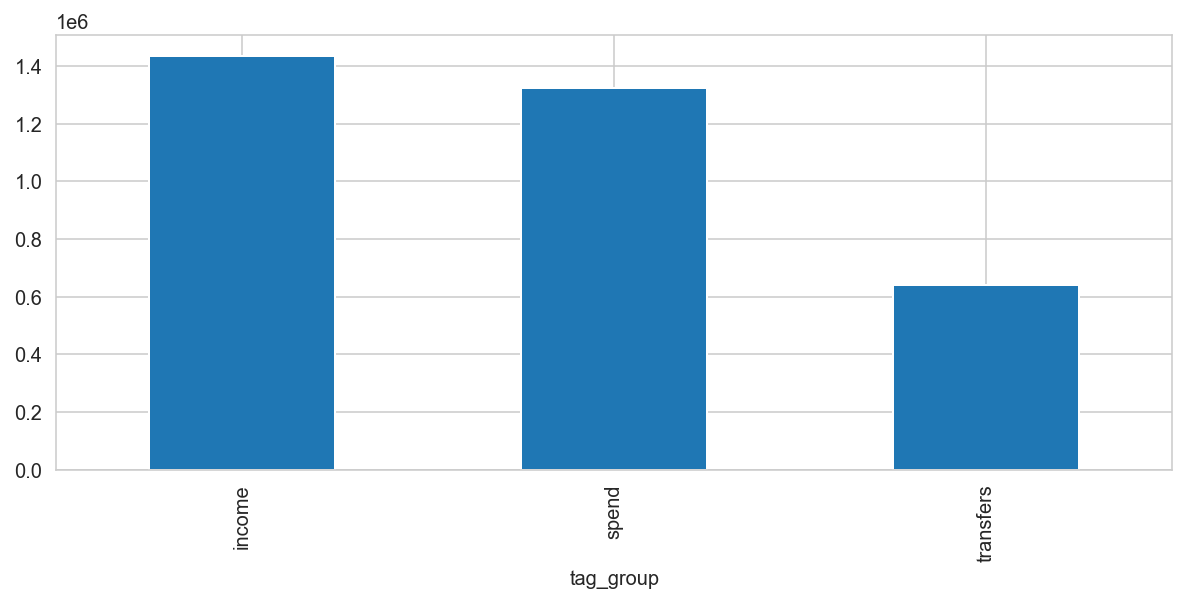

In [7]:
df.groupby("tag_group").amount.sum().abs().plot(kind="bar", **plotargs);

### Breakdown into tag variable

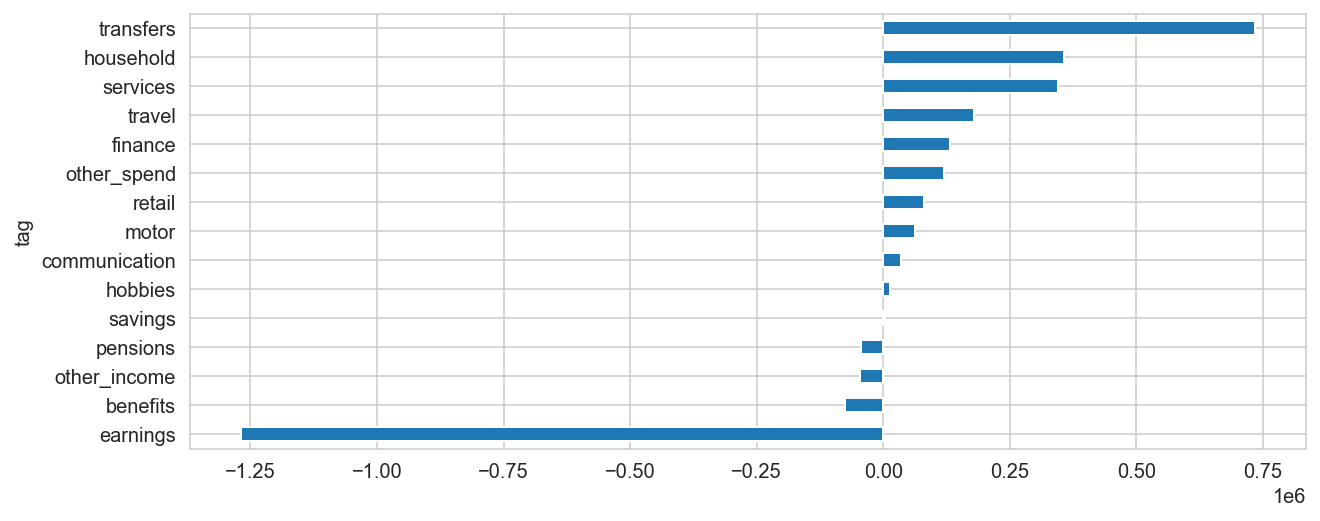

In [8]:
df.groupby("tag", dropna=False).amount.sum().round().sort_values().plot(
    kind="barh", **plotargs
);

### Breakdown of individual tags into auto tags

`tags` has 9 different categories based on Lloyds data classification in muggleton2021evidence. `tag_auto` is MDB variable and has around 200 categories.

In [9]:
def breakdown(df, group_var, group_var_value, component_var, net=False):
    """Calculates sorted breakdown of group_var_value by component_var."""
    return (
        df[df[group_var] == group_var_value]
        .assign(amount=lambda df: df.amount if net else df.amount.abs())
        .groupby(component_var)
        .amount.sum()
        .replace(0, np.nan)
        .dropna()
        .sort_values()
    )

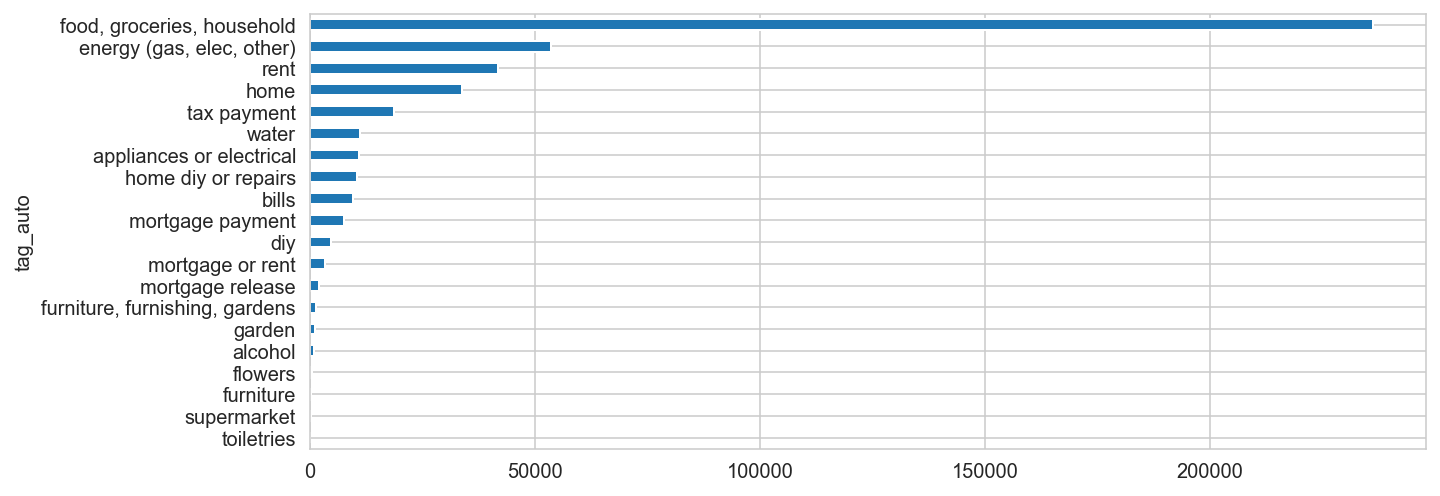

In [10]:
breakdown(df, "tag", "servi", "tag_auto").plot(kind="barh", **plotargs);

### Breakdown of auto tag into merchants

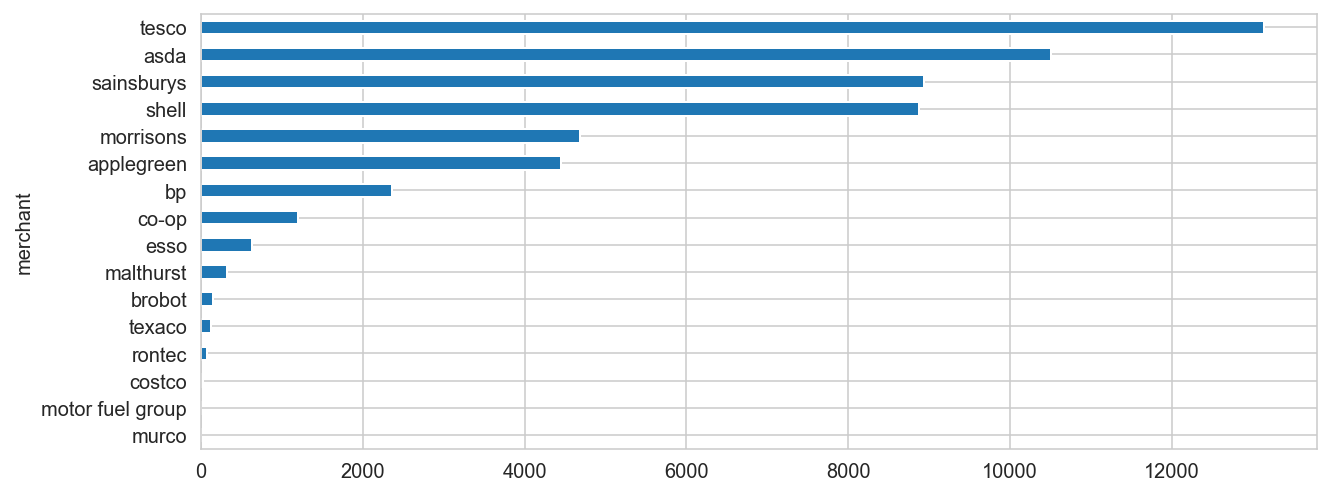

In [11]:
breakdown(df, "tag_auto", "fuel", "merchant").plot(kind="barh", **plotargs);